In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## Zero Hidden Layer involved

In [6]:
model_zero_hidden = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

In [7]:
model_zero_hidden.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_zero_hidden.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
model_zero_hidden.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4671 - accuracy: 0.8787
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3044 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2667 - accuracy: 0.9253


In [10]:
model_zero_hidden.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.9237


[0.27293723821640015, 0.9236999750137329]

In [54]:
y_pred = model_zero_hidden.predict(x_test)

In [55]:
y_pred[0]

array([5.0068200e-02, 3.8092458e-07, 4.9081922e-02, 9.6567827e-01,
       3.0198097e-03, 1.8071795e-01, 1.3044024e-06, 9.9981505e-01,
       8.3062470e-02, 6.6946691e-01], dtype=float32)

In [13]:
np.argmax(y_pred[0])

7

In [14]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

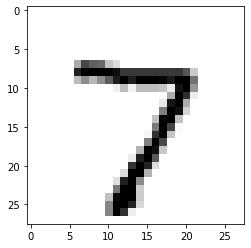

In [15]:
plt.imshow(x_test[0], cmap=plt.cm.binary)

In [16]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
print(cm)

tf.Tensor(
[[ 968    0    1    2    0    4    2    2    1    0]
 [   0 1113    3    2    0    1    4    2   10    0]
 [   9    9  923   20    6    3   10   11   38    3]
 [   4    0   17  922    0   26    1   15   18    7]
 [   2    1    7    2  907    1    8    5   10   39]
 [  11    2    5   36    6  785    8    6   27    6]
 [  16    3   10    1    7   23  893    2    3    0]
 [   1    5   21    5    4    0    0  962    4   26]
 [  12    7    6   26    9   35    7   13  852    7]
 [  12    7    1   11   24    8    0   32    2  912]], shape=(10, 10), dtype=int32)


In [52]:
accuracy_score(y_test, y_pred_labels)

0.9237

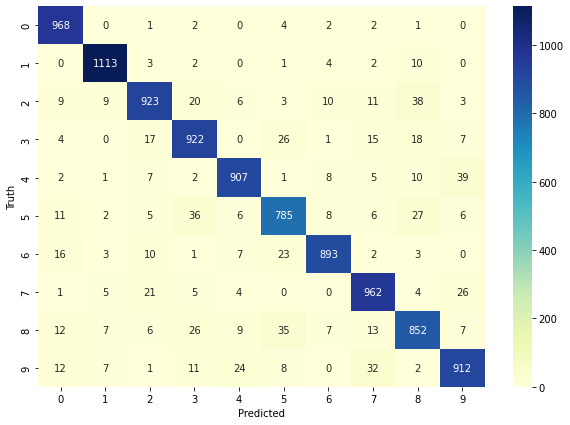

In [17]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## One Hidden Layer is involved

In [18]:
model_one_hidden = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
model_one_hidden.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_one_hidden.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
model_one_hidden.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2771 - accuracy: 0.9201
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1259 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0878 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0668 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0531 - accuracy: 0.9843


In [22]:
model_one_hidden.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0795 - accuracy: 0.9759


[0.07946917414665222, 0.9758999943733215]

In [44]:
y_pred_one_hidden = model_one_hidden.predict(x_test)

In [46]:
y_pred_one_hidden_labels = [np.argmax(i) for i in y_pred_one_hidden]
y_pred_one_hidden_labels[0]

7

In [48]:
cm_one_hidden = tf.math.confusion_matrix(y_test, y_pred_one_hidden_labels)

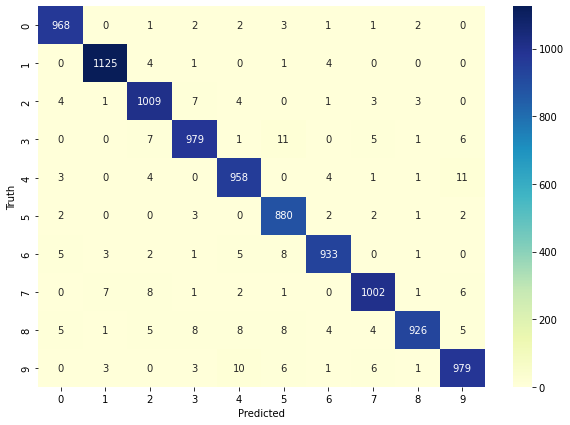

In [49]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_one_hidden, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test, y_pred_one_hidden_labels)

0.9759

## CNN with only one Convolution Layer.

In [34]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(30, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [35]:
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 30)        300       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 30)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5070)              0         
                                                                 
 dense_5 (Dense)             (None, 100)               507100    
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 508,410
Trainable params: 508,410
Non-trainable params: 0
________________________________________________

In [36]:
model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

In [39]:
x_train_cnn.shape

(60000, 28, 28, 1)

In [40]:
x_test_cnn.shape

(10000, 28, 28, 1)

In [41]:
model_cnn.fit(x_train_cnn, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1553 - accuracy: 0.9544
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0537 - accuracy: 0.9840
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0344 - accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0230 - accuracy: 0.9930
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0161 - accuracy: 0.9945


In [42]:
model_cnn.evaluate(x_test_cnn, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0441 - accuracy: 0.9860


[0.044100381433963776, 0.9860000014305115]

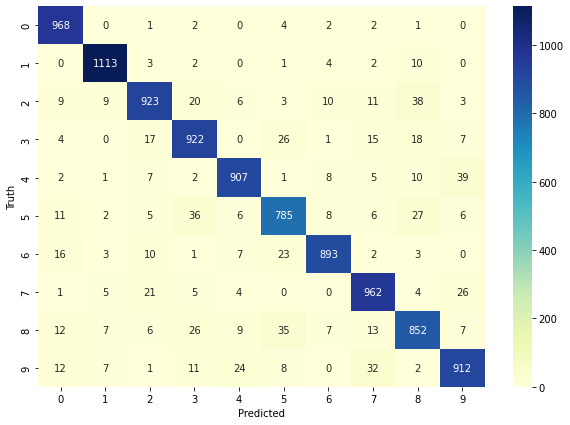

In [43]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [57]:
y_pred_one_cnn = model_cnn.predict(x_test)
y_pred_one_cnn_label = [np.argmax(i) for i in y_pred_one_cnn]
y_pred_one_cnn_label[0]

7

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_one_cnn_label)

0.986